In [1]:
# Importer les librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer les paramètres de visualisation
sns.set(style="whitegrid")

# Objectif 1 : Profiler les données

Le premier objectif est de lire les données des annonces AirBnB, de calculer des métriques de profilage de base, de modifier les types de colonnes si nécessaire, et de filtrer uniquement les annonces situées à Paris.

## Étapes à réaliser :

1. **Importer et ouvrir le fichier `Listings.csv`.**

2. **Explorer les données :**
   - Afficher les premières lignes du DataFrame avec `.head()`.
   - Afficher les types de données (dtypes) avec `.dtypes`.

3. **Convertir les colonnes de date au format datetime si nécessaire.**

4. **Filtrer les données pour ne garder que les lignes où la ville est "Paris", et conserver uniquement les colonnes suivantes :**
   - `host_since`
   - `neighbourhood`
   - `city`
   - `accommodates`
   - `price`

5. **Effectuer un contrôle qualité sur les données des annonces parisiennes :**
   - Vérifier les valeurs manquantes.
   - Calculer le minimum, le maximum et la moyenne pour chaque champ numérique avec `.describe()`.
   - Obtenir des informations générales sur les colonnes et les types de données avec `.info()`.

---

In [30]:
# Importer les données
listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1', low_memory=False)


In [31]:
# Afficher un aperçu des données
print(listings.head())

   listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-11-29  Paris, Ile-de-France, France                NaN   
2  2014-07-31  Paris, Ile-de-France, France                NaN   
3  2013-12-17  Paris, Ile-de-France, France                NaN   
4  2014-12-14  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN                 f   
1         

In [32]:
# Vérifier les types de colonnes
print(listings.dtypes)

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [38]:
# Convertir les colonnes de date au format datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [34]:
# Filtrer les annonces à Paris
paris_listings = listings[listings['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [39]:
# Calculer les métriques de base pour les colonnes numériques
print(paris_listings[['accommodates', 'price']].describe())

       accommodates         price
count  64690.000000  64690.000000
mean       3.037997    113.096445
std        1.588766    214.433668
min        0.000000      0.000000
25%        2.000000     59.000000
50%        2.000000     80.000000
75%        4.000000    120.000000
max       16.000000  12000.000000


In [51]:
# Rechercher les logements dont "accommodates" et "price" sont à 0
# Il y a seulement 54 logements (moins de 1% des données) où "accommodates" et "price" sont à 0.
# Aucune action nécessaire.
paris_listings.query("accommodates == 0 and price == 0").count()

,0
host_since,54
neighbourhood,54
city,54
accommodates,54
price,54


In [53]:
# Afficher les valeurs manquantes
# Il y a seulement 33 valeurs manquantes (moins de 1% des données) donc aucune action nécessaire.
print(paris_listings.isnull().sum())

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64


In [54]:
# Afficher un résumé concis
print(paris_listings.info)

<bound method DataFrame.info of        host_since      neighbourhood   city  accommodates  price
0      2011-12-03  Buttes-Montmartre  Paris             2     53
1      2013-11-29  Buttes-Montmartre  Paris             2    120
2      2014-07-31             Elysee  Paris             2     89
3      2013-12-17          Vaugirard  Paris             2     58
4      2014-12-14              Passy  Paris             2     60
...           ...                ...    ...           ...    ...
279707 2015-04-13       Observatoire  Paris             2    120
279708 2013-11-27  Buttes-Montmartre  Paris             2     60
279709 2012-04-27  Buttes-Montmartre  Paris             2     50
279710 2015-07-16         Popincourt  Paris             2    105
279711 2013-06-17  Enclos-St-Laurent  Paris             2     70

[64690 rows x 5 columns]>


# Objectif 2 : Préparer les données pour la visualisation

Le second objectif est de créer des DataFrames destinés aux visualisations en agrégeant et manipulant les données des annonces de différentes manières.

## Étapes à réaliser :

1. **Créer une table `paris_listings_neighbourhood`**  
   - Grouper les annonces parisiennes par `neighbourhood`.  
   - Calculer le prix moyen (`mean price`) pour chaque quartier.  
   - Trier les résultats par ordre croissant de prix moyen.

2. **Créer une table `paris_listings_accommodations`**  
   - Filtrer les annonces pour ne conserver que celles du quartier le plus cher.  
   - Grouper les annonces par la colonne `accommodates`.  
   - Calculer le prix moyen (`mean price`) pour chaque capacité d'accueil (`accommodates`).  
   - Trier les résultats par ordre croissant de prix moyen.

3. **Créer une table `paris_listings_over_time`**  
   - Grouper les annonces par l'année d'inscription des hôtes (`host_since year`).  
   - Calculer le prix moyen (`mean price`) et compter le nombre de nouvelles inscriptions (`count of rows`).  

---



In [60]:
#Créer une table `paris_listings_neighbourhood'
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg(mean_price=('price', 'mean'))
    .sort_values(by='mean_price')
)
print(paris_listings_neighbourhood.head())

                   mean_price
neighbourhood                
Menilmontant        74.942257
Buttes-Chaumont     82.690182
Buttes-Montmartre   87.209479
Reuilly             89.058402
Popincourt          90.559459


In [76]:
 #Table par capacité d'accueil dans le quartier le plus cher
paris_listings_accommodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg(mean_price=('price', 'mean'))
    .sort_values(by='mean_price')
)

print(paris_listings_accommodations)


              mean_price
accommodates            
0               0.000000
1              79.522222
3             152.828767
2             155.103352
4             212.096070
5             328.817073
6             355.508571
8             405.518519
7             411.538462
9             440.272727
10            500.857143
12            529.625000
16            800.000000
11            805.000000
13            842.500000
14            971.000000


In [83]:
#Créer une table `paris_listings_over_time`
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")  # Utiliser "YE" au lieu de "Y"
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Objectif 3 : Visualiser les données et résumer les conclusions

L'objectif final est de créer des visualisations pour illustrer :
- Le nombre de nouveaux hôtes par année.
- Le prix moyen par année et par quartier.
- Le prix moyen pour différents types d'annonces dans le quartier le plus cher de Paris.

## Étapes à réaliser :

1. **Créer un graphique à barres horizontal du prix moyen par quartier à Paris**  
   - Ajouter un titre au graphique.  
   - Modifier les labels des axes pour une meilleure lisibilité.

2. **Créer un graphique à barres horizontal du prix moyen par nombre de couchages dans le quartier le plus cher de Paris**  
   - Ajouter un titre au graphique.  
   - Modifier les labels des axes pour une meilleure lisibilité.

3. **Créer deux graphiques en ligne :**
   - Le premier montrant le nombre de nouveaux hôtes au fil du temps.  
   - Le second affichant le prix moyen au fil du temps.  
   - Définir une limite de l'axe des ordonnées à 0, ajouter un titre, et modifier les labels des axes.





<Figure size 1000x600 with 0 Axes>

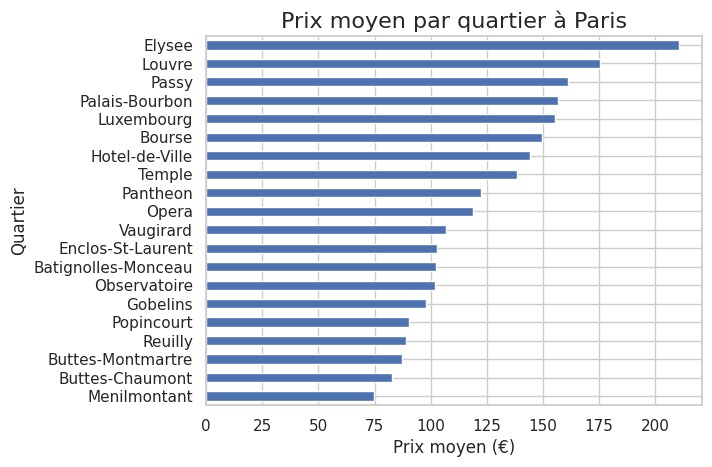

In [89]:
# Créer un graphique à barres horizontal du prix moyen par quartier
plt.figure(figsize=(10, 6))
paris_listings_neighbourhood.sort_values(by='mean_price', ascending=True).plot(
    kind='barh', legend=False)
plt.title("Prix moyen par quartier à Paris", fontsize=16)
plt.xlabel("Prix moyen (€)", fontsize=12)
plt.ylabel("Quartier", fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

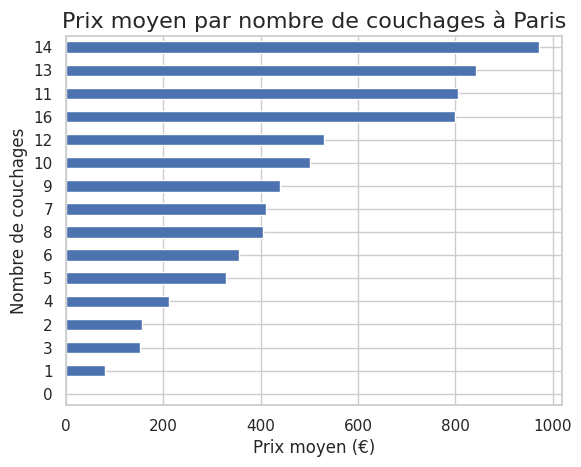

In [92]:
#Créer un graphique à barres horizontal du prix moyen par nombre de couchages
plt.figure(figsize=(10, 6))
paris_listings_accommodations.sort_values(by='mean_price', ascending=True).plot(
    kind='barh', legend=False)
plt.title("Prix moyen par nombre de couchages à Paris", fontsize=16)
plt.xlabel("Prix moyen (€)", fontsize=12)
plt.ylabel("Nombre de couchages", fontsize=12)
plt.show()

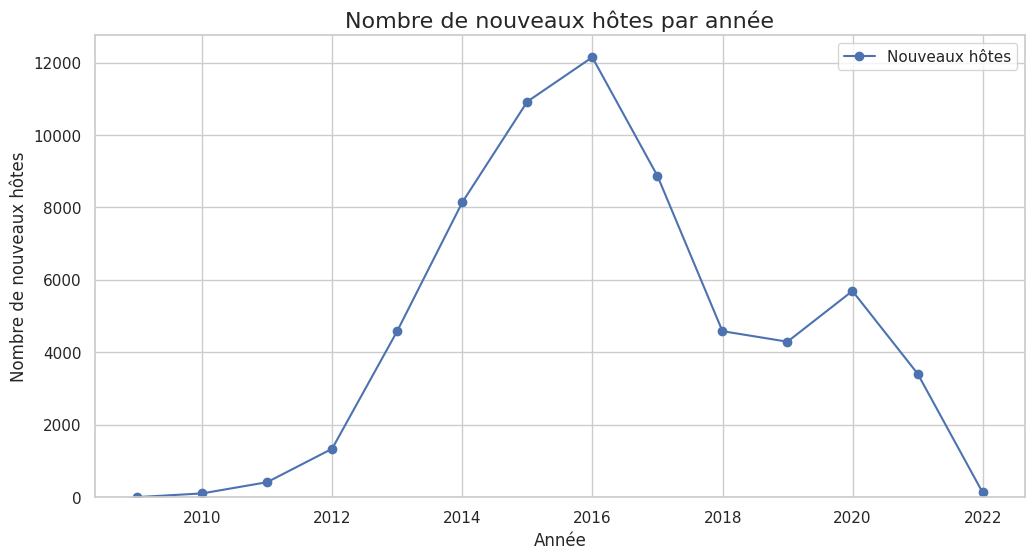

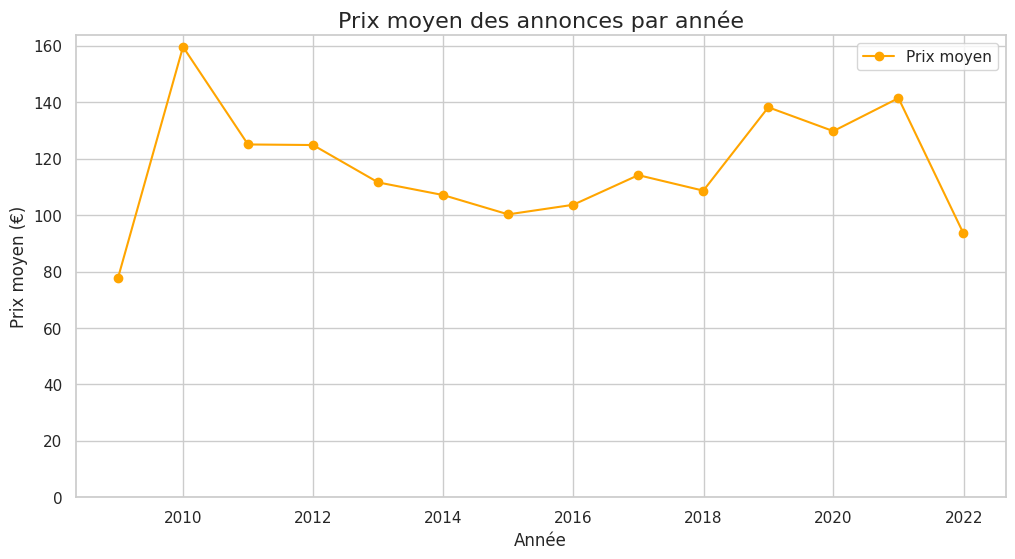

In [93]:
#Créer un graphique en ligne montrant le nombre de nouveaux hôtes au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(paris_listings_over_time.index, paris_listings_over_time['neighbourhood'], marker='o', label='Nouveaux hôtes')
plt.title("Nombre de nouveaux hôtes par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de nouveaux hôtes", fontsize=12)
plt.ylim(0)  # Fixer la limite de l'axe y à 0
plt.grid(True)
plt.legend()
plt.show()

#Créer un graphique en ligne montrant le prix moyen au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(paris_listings_over_time.index, paris_listings_over_time['price'], marker='o', color='orange', label='Prix moyen')
plt.title("Prix moyen des annonces par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Prix moyen (€)", fontsize=12)
plt.ylim(0)  # Fixer la limite de l'axe y à 0
plt.grid(True)
plt.legend()
plt.show()